# 0. Imports and definitions of functions to be used

In [3]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import time
import matplotlib.pyplot as plt
from IPython import display

def EnforceBoundaryConditions(image, original_image, boundary):
    if boundary == 'Dirichlet (zeros)':
        # Encforce Boundary Conditions
        image[0,:] = 0 #First row
        image[-1,:] = 0 #last row
        image[:, 0] = 0 #First column
        image[:, -1] = 0 #Last column
    elif boundary == 'Dirichlet (input)':
        image[0,:] = original_image[0,:] #First row
        image[-1,:] = original_image[-1,:] #last row
        image[:, 0] = original_image[:, 0] #First column
        image[:, -1] = original_image[:, -1] #Last column
    elif boundary == 'Neumann':
        image[0,:] = image[1,:] #First row
        image[-1,:] = image[-2,:] #last row
        image[:, 0] = image[:,1] #First column
        image[:, -1] = image[:,-2] #Last column
    else:
        raise ValueError("Boundary type not found");
    return image

def denoise(Image, c, delta_t, maxT, boundary):
    # this code is not intended to be efficient. 

    # Determine the number of pixels in the X and Y axes
    (nY, nX) = Image.shape

    # Calculate the spatial increments in the X and Y axes
    delta_x=1/(nX-1)
    delta_y=1/(nY-1)
    
    # Copy the input image (initialization)
    ImageFiltered = Image.copy()

    # Initialize plot for visualization
    plt.figure()
    
    # Initialize total simulation time
    elapsedT=0.
    while  elapsedT <= maxT:
        # inner points
        for j in range(1,nX-1):
            for i in range(1,nY-1):
                I_xx = (ImageFiltered[i,j+1] - 2*ImageFiltered[i,j] + ImageFiltered[i,j-1])/(delta_x**2)
                I_yy = (ImageFiltered[i+1,j] - 2*ImageFiltered[i,j] + ImageFiltered[i-1,j])/(delta_y**2)

                ImageFiltered[i,j] += delta_t*c*(I_xx+I_yy)

        # Enforce Boundary Conditions
        ImageFiltered = EnforceBoundaryConditions(ImageFiltered, Image, boundary)

        # Update simulation time
        elapsedT += delta_t

        # Visualization
        plt.imshow(ImageFiltered, cmap='gray')
        display.clear_output(wait=True)
        display.display(plt.gcf())
        
    display.clear_output(wait=True)

    return ImageFiltered



def inpaint(Image, c, delta_t, maxT, boolean_mask, boundary):
    # this code is not intended to be efficient. 

    # Determine the number of pixels in the X and Y axes
    (nY, nX) = Image.shape

    # Calculate the spatial increments in the X and Y axes
    delta_x=1/(nX-1)
    delta_y=1/(nY-1)
    
    # Copy the input image (initialization)
    ImageFiltered = Image.copy()

    # Initialize plot for visualization
    plt.figure()
    
    # Initialize total simulation time
    elapsedT=0.
    while  elapsedT <= maxT:
        # inner points
        for j in range(1,nX-1):
            for i in range(1,nY-1):
                I_xx = (ImageFiltered[i,j+1] - 2*ImageFiltered[i,j] + ImageFiltered[i,j-1])/(delta_x**2)
                I_yy = (ImageFiltered[i+1,j] - 2*ImageFiltered[i,j] + ImageFiltered[i-1,j])/(delta_y**2)

                ImageFiltered[i,j] = ImageFiltered[i,j] + delta_t*c*(I_xx+I_yy)

        # Recover fixed values (mask)
        ImageFiltered[boolean_mask] = Image[boolean_mask]
        
        # Enforce Boundary Conditions
        ImageFiltered = EnforceBoundaryConditions(ImageFiltered, Image, boundary)

        # Update simulation time
        elapsedT += delta_t

        # Visualization
        plt.imshow(ImageFiltered, cmap='gray')
        display.clear_output(wait=True)
        display.display(plt.gcf())

    display.clear_output(wait=True)

    return ImageFiltered


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 0. Load image to be denoised

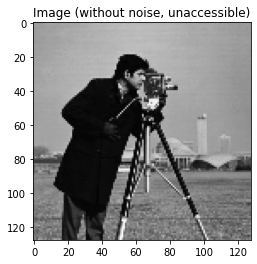

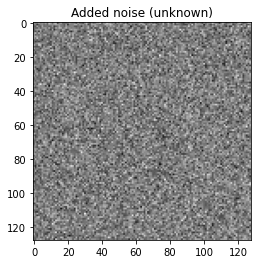

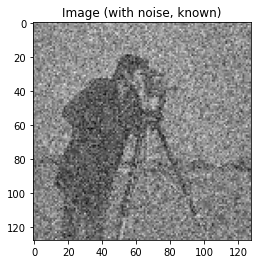

In [4]:
# Read the image and correct mirroring
CameraMan = mpimg.imread('cameraman.jpg')
CameraMan = CameraMan[0:-1:2,0:-1:2,0].astype('double')

# Image normalization (The values are scaled into the [0,1] range)
CameraMan=CameraMan/255

# Simulate noise 
noise = 0.3*np.random.randn(CameraMan.shape[0], CameraMan.shape[1])
CameraMan = CameraMan + noise


# Plot original image
plt.figure()
plt.imshow(CameraMan - noise, cmap='gray')
plt.title('Image (without noise, unaccessible)')
plt.show()

# Plot added noise
plt.figure()
plt.imshow(noise, cmap='gray')
plt.title('Added noise (unknown)')
plt.show()

# Plot image
plt.figure()
plt.imshow(CameraMan, cmap='gray')
plt.title('Image (with noise, known)')
plt.show()

# Problem 1

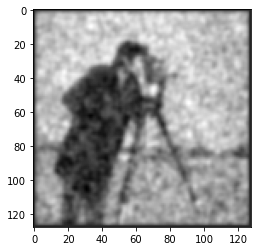

In [18]:
# Question 1.4
# Parameter initialization
c = 0.5 # Diffusion coefficient
delta_t = 1e-5 #Time step 1e-5 
maxT = 1e-4; #artificial maximum time
output_problem_1_4 = denoise(CameraMan, c, delta_t, maxT, 'Dirichlet (zeros)')

###### Question 1.5 - Increase maximum simulation time

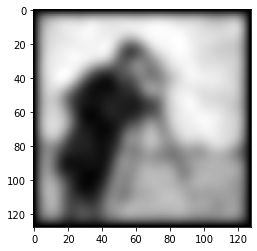

In [17]:
# Question 1.5
# Parameter initialization
c = 0.5 # Diffusion coefficient
delta_t = 1e-5
maxT = 0.001
output_problem_1_5 = denoise(CameraMan, c, delta_t, maxT, 'Dirichlet (zeros)')

###### Question 1.7 - Change to Dirichlet boundary conditions that restore input's values

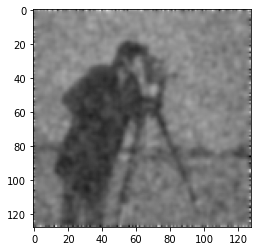

In [16]:
# Question 1.7
# Parameter initialization
c = 0.5 # Diffusion coefficient
delta_t = 1e-5
maxT = 1e-4
output_problem_1_7 = denoise(CameraMan, c, delta_t, maxT, 'Dirichlet (input)')

###### Question 1.8 - Increase the delta_t value

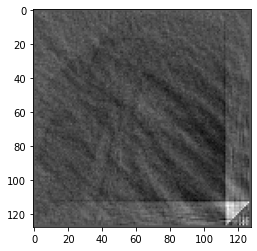

In [20]:
# Question 1.8
# Parameter initialization
c = 0.5 # Diffusion coefficient
delta_t = 6.25*1e-5
maxT = 1e-3
output_problem_1_8 = denoise(CameraMan, c, delta_t, maxT, 'Dirichlet (zeros)')


###### Question 1.10 - Apply Neumann boundary conditions

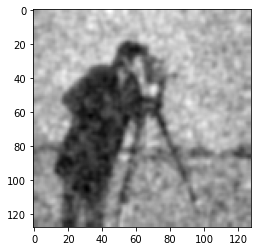

In [11]:
# Question 1.8
# Parameter initialization
c = 0.5 # Diffusion coefficient
delta_t=1e-5
maxT = 1e-4
IfilteredI_1_10 = denoise(CameraMan, c, delta_t, maxT, 'Neumann')


# Problem 2 - Inpainting equation

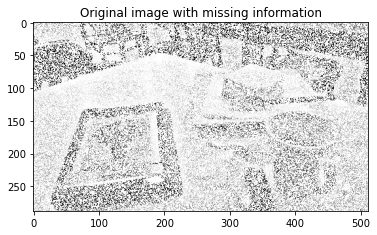

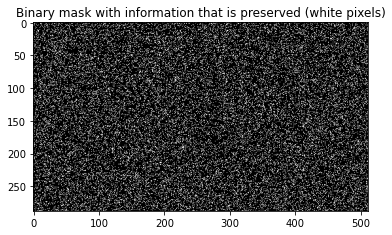

In [23]:
# Read the image
InpaintingImage = mpimg.imread('image3_toRestore.jpg')

# Normalization (The values are scaled into the [0,1] range)
InpaintingImage = InpaintingImage/255

# Read binary mask
# We want to inpaint those areas in which mask == True
# boolean_mask(i,j) == True  means we *have*      information in that pixel
# boolean_mask(i,j) == False means we *have lost* information in that pixel
boolean_mask = np.logical_not(mpimg.imread('image3_mask.jpg'))

# Plot the image before processing:
plt.figure()
plt.imshow(InpaintingImage,cmap='gray')
plt.title('Original image with missing information')
plt.show()

# Plot the binary mask to be applied:
plt.figure()
plt.imshow(boolean_mask,cmap='gray')
plt.title('Binary mask with information that is preserved (white pixels)')
plt.show()

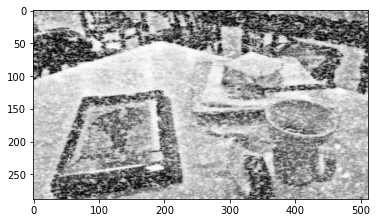

In [24]:
# Question 2
# Parameter initialization
c = 0.5 # Diffusion coefficient
delta_t=1e-6
maxT = 2e-5 # simulation maximum time
recovered_image = inpaint(InpaintingImage, c, delta_t, maxT, boolean_mask, 'Neumann')